## 예측(prediction) 분석 방법론 - 지도학습(supervised learning)

In [1]:
from IPython.display import Image

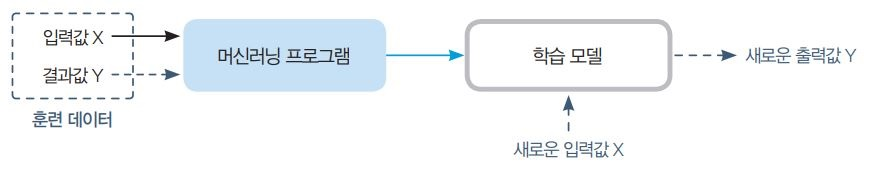

In [2]:
Image('C:/Users/com/Desktop/data_science/2022_1/Lecture_06/figure1.jpg', width = 600)

- 지도학습(supervised learning)은 훈련용 데이터(training data)에 독립변수(x)와 종속변수(y)가 같이 제공된다. 즉, 문제(x)에 대한 답(y)을 아는 상황에서 학습해 예측하게 된다.

### 자동차 연비 예측하기

- 자동차 연비 데이터: UCI Machine Learning Repository
<br>
link : https://archive.ics.uci.edu/ml/datasets/auto+mpg (Data Folder → auto-mpg.data 다운로드)
<br><br>
- 다운로드 후 엑셀에서 csv파일로 변경

In [1]:
import numpy as np
import pandas as pd

data_df = pd.read_csv('/Users/zoe/Downloads//auto-mpg.csv', header = 0, engine = 'python')

In [2]:
print('데이터셋 크기: ',data_df.shape)
data_df.head()

데이터셋 크기:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False)
print('데이터셋 크기: ',data_df.shape)
data_df.head()

데이터셋 크기:  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


- 자동차 연비 예측을 위해 선형 회귀 분석 모델을 구축
<br><br>
- 여기서 예측 모형을 구축할 훈련용 데이터와, 구축된 모형을 평가할 테스트 데이터를 나눔

In [21]:
from sklearn.linear_model import LinearRegression # 선형 회귀 분석
from sklearn.model_selection import train_test_split # 데이터셋 분리 작업
from sklearn.metrics import mean_squared_error, r2_score # MSE(mean squared erroe), R-square (모형 성능 확인)

In [22]:
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

- 훈련용 데이터를 통한 예측 모형 구축

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, Y_train)

LinearRegression()

- 테스트용 데이터의 X값을 통해 예측된 Y값 생성

In [26]:
intercept = np.round(lr.intercept_,2)
intercept

-17.55

In [27]:
coef = pd.Series(data = np.round(lr.coef_,2), index = X.columns)
coef

cylinders      -0.14
displacement    0.01
weight         -0.01
acceleration    0.20
model_year      0.76
dtype: float64

- 최종적으로 구축된 모형은 다음과 같다.
<br><br>
$Y_{mpg} = - 17.55 - 0.14 X_{cylinders} + 0.01 X_{displacement} - 0.01 X_{weight} + 0.20 X_{acceleration} + 0.76 X_{model year}$

In [28]:
Y_predict = lr.predict(X_test)

- MSE, $R^{2}$ 를 통한 모형 평가
<br><br>
- 위 지표를 통해 예측이 잘 되었는지, 모형은 사용하기에 적절한지 확인

In [30]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-square : {0:.3f}'.format(r_square))

MSE : 12.278, RMSE : 3.504
R-square : 0.808


- mpg와 나머지 5개 변수간 관계에 대한 산점도와 선형 회귀 그래프 (시각화)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

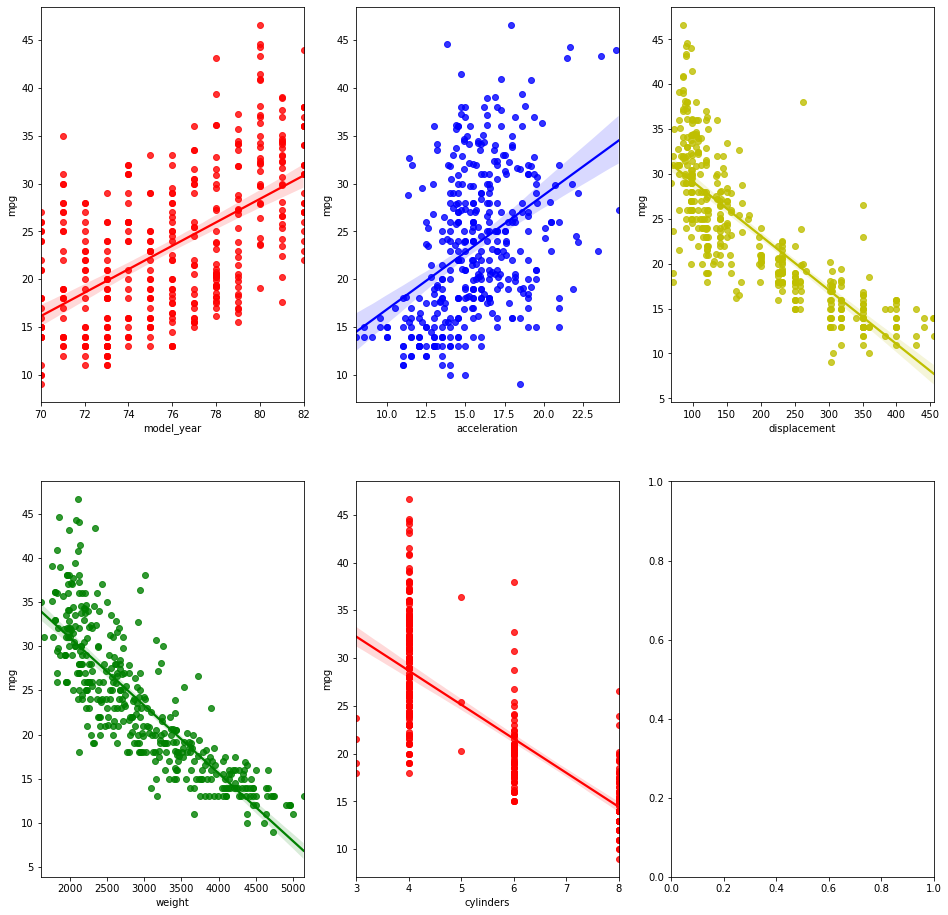

In [32]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

- 임의의 데이터에 대한 연비 예측

In [41]:
print('차의 정보를 입력해주세요.')

cylinders_new = int(input('cylinders : ')) # 8
displacement_new = int(input('displacement : ')) # 350
weight_new = int(input('weight : ')) # 3200
acceleration_new = int(input('acceleration : ')) # 22
model_year_new = int(input('model year : ')) # 99

차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model year : 99


In [42]:
mpg_predict = lr.predict([[cylinders_new, displacement_new, weight_new, acceleration_new, model_year_new]])

In [43]:
print('입력된 차종의 예상 연비는 %.2f입니다.' % mpg_predict)

입력된 차종의 예상 연비는 41.32입니다.
